# CS 1010
# Week 5 - Image Processing and Caesar Cipher
    
### Instructor: 
**Prof. Kartik Bulusu [CS & MAE]**

#### Teaching Assistants: 
**Marshall Thompspon [CS], Jonathan Garcia [MAE], Matthew Dionne [CS]**

#### Learning Assistants: 
**Josie Libbon [CS], Josh Rizika [CS Dept], Miles Grant [CS], Addy Irankunda [Physics], Talia Novack [CS] Fred Kamgang [CS]**


If you have any questions regarding Python, please feel free to send a slack message or email to a member of the teaching team or come to office hours! We are happy to help!!

Let's start by importing our favorite friends as always going forward in this class: **numpy**, **matplotlib**, and **pandas**

We are also going to import the **PIL** library today for image tools

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import PIL

## Intro to the PIL Library

The Python Image Library, also known as PIL, is one of several packages to process images in python, and the one we will be using. 

A fork of PIL is known as pillow, but that would require `!pip install pillow` as a first step. You can explore that, but we will stick with the default PIL library to make it easier for this course!

#### Image.open()

`PIL.Image.open()` is used to create a python object that represents the image that is saved in the data of the path

This is similar to using `pd.read_csv(PATH)` to convert a csv file to a pandas dataframe object.


#### IMG.show()

Simply shows the image saved as the name `IMG`

#### IMG.mode

This gives us the current color mode of our image from this list:
- **1**: 1-bit pixels, black and white
- **L**: 8-bit pixels, Greyscale
- **P**: 8-bit pixels, mapped to any other mode using a color palette
- **RGB**: 3×8-bit pixels, true color
- **RGBA**: 4×8-bit pixels, true color with transparency mask

#### .convert()

The `IMAGE.convert(CONVERSION)` tells the image to change it's color mode to a new one specified


In [2]:
img = PIL.Image.open('Week5/einstein.png')

#UNCOMMENT this to see the results, it's really big, so we'll keep it hidden
#img.show()

print(img.mode)

img1 = img.convert("1")

#UNCOMMENT this to see the results!
#img1.show()

L


#### IMG.size

`IMG.size` returns the current size of the image

#### IMG.resize((width, height))

Adjusts the image to the new size. Very similar to `plt.subplots(figsize=(width, height))` from last week!

In [3]:
print(img.size)

(1280, 1024)


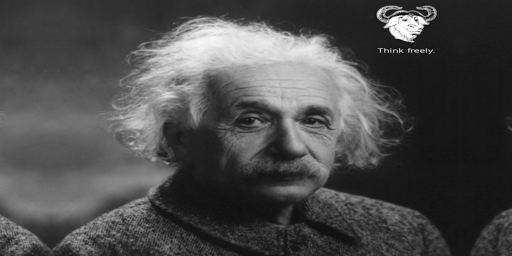

In [4]:
img2 = img.resize((512, 256))
img2.show()

#### Saving the image!

We won't cover this in class, but if you'd like to save a modified image to the DeepNote workspace, you can using `IMG.save(path)`

In [5]:
img2.save('Week5/einstein_mod.png')

## Images as numpy arrays

An image is just a matrix with each pixel having a value. Let's use the Einstein image and turn it into a numpy array to work with!

In [6]:
einstein_arr = np.array(img, dtype='int16')
print(einstein_arr)

#each 8-bit pixel is now a 16 bit integer arranged into a matrix!

print(einstein_arr.shape)

[[49 49 49 ... 34 35 35]
 [49 50 49 ... 33 34 34]
 [49 49 49 ... 33 33 33]
 ...
 [39 35 33 ... 54 52 47]
 [39 34 32 ... 51 49 46]
 [40 34 33 ... 51 49 46]]
(1024, 1280)


Notice how the shape of the matrix according to numpy is `(1024, 1280)`, but the size of the image according to PIL is `(1280, 1024)`. This is because they are looking at the same thing from two different perspectives. 

Numpy sees the image as a matrix with 1024 rows and 1280 columns. The same way pandas sees a dataframe!

PIL sees the image with a width of 1280 pixels, and a height of 1024 pixels. The same way matplotlib sees a figsize!

It can be a bit confusing, but it's important to recognize the difference

To show the numpy version, we use first set up matplotlib ax using our `fig, axs = plt.subplots()` friend from last week, then we use `ax.imshow(ARRAY)`

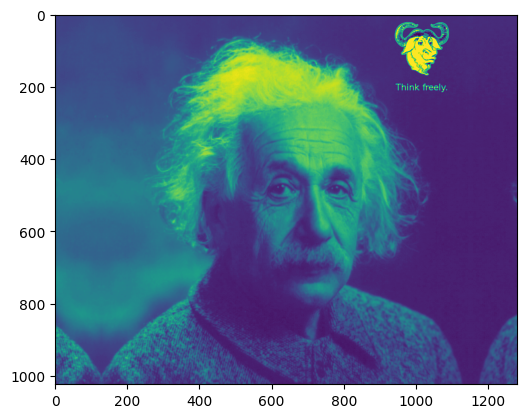

In [7]:
fig, ax = plt.subplots()

ax.imshow(einstein_arr);

#by default it shows with a color scheme, lets adjust that

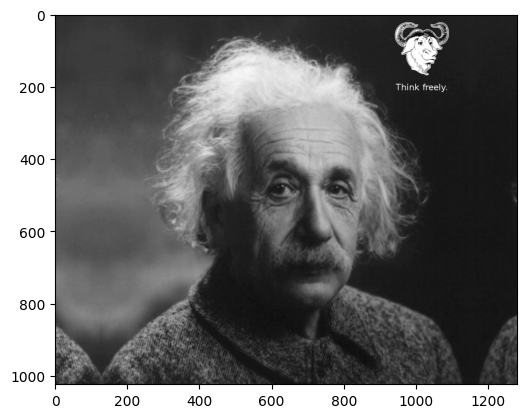

In [8]:
fig, ax = plt.subplots()

ax.imshow(einstein_arr, cmap='gray');

Just like other classes, we can do operations to this numpy array. 

Let's start with a transpose operation

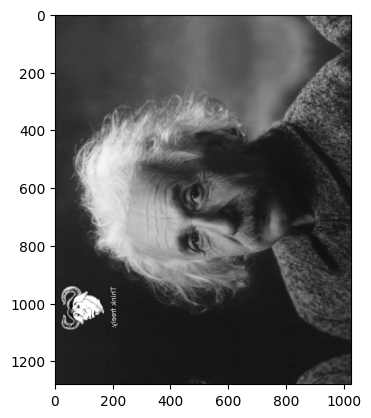

In [9]:
new1 = np.transpose(einstein_arr)

fig, ax = plt.subplots()

ax.imshow(new1, cmap='gray');

What about slicing?

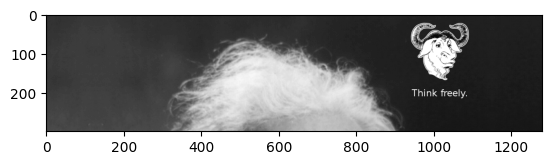

In [10]:
new2 = einstein_arr[0:300, :]

fig, ax = plt.subplots()

ax.imshow(new2, cmap='gray');

## Caesar Cipher

We want to encrypt and decrypt images. To do this, we will use a Caesar Cipher.

If you want to learn more about the Caesar Cipher, you can read about it [here](https://en.wikipedia.org/wiki/Caesar_cipher)

### Step 0 - Pull in our image

In [11]:
im = PIL.Image.open('Week5/picture1.jpeg')
im1 = im.convert('L')

### Step 1 - Covert our image to a numpy array

In [12]:
pix = np.array(im1, dtype='int16')
print(pix)

#each 8-bit pixel is now a 16 bit integer arranged into a matrix!

print(pix.shape)

[[ 24  23  23 ... 215 218 223]
 [ 23  23  22 ... 213 219 226]
 [ 22  22  21 ... 210 219 226]
 ...
 [ 32  33  33 ...  12  12  12]
 [ 31  32  32 ...  12  12  12]
 [ 30  31  31 ...  12  12  12]]
(267, 400)


### Step 2 - Show our array using matplotlib

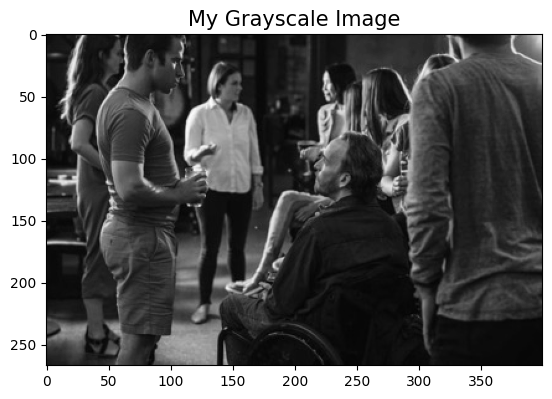

In [13]:
fig, ax = plt.subplots()

ax.set_title('My Grayscale Image', fontsize=15)
ax.imshow(pix, cmap='gray');

### Step 3 - Encryption Key Input

We need to get the encryption key for our cipher. 

We'll demonstrate option 1 in class, but we've provided options 1-3 for you!
1. Simple input statement
2. Input statement with validation
3. Slider input

#### Option 1
We are going to use an `input` statement to ask the user to provide a value between 1 and 250.  

**Note:** Press "Enter" to confirm your selection. 

In [14]:
#my_key = int(input("What is your encryption key? Enter a value between 1 and 250: "))

#### Option 2

We don't expect you to do this, but it's just for your reference!

We can make our key request less prone to being tampered with if we add some logic using **while loops**, **if statements** and other **conditionals**

In [16]:
#key = input("What is your encryption key? Enter a value between 1 and 250")
#acceptable_key = False

#while not acceptable_key:
#    try:
#        key = int(key)
#        if key > 0 and key <= 250:
#            acceptable_key = True
#            my_key2 = key
#        else:
#            key = input('Please enter a number between 1 and 250 for your key')
#    except ValueError:
#        key = input('Please enter an integer key between 1 and 250')

#### Option 3

We can use DeepNote's built in slider blocks, but this isn't very secretive, to enter a number value.

1. Click on **+ Block**, then scroll to **slider** and click
2. Update input_1 to the variable name of your choice
3. Update the range to 1 and 250

In [17]:
my_key3 = 159

### Step 4 - Encrypt the image and show it

We will use a **nested for loop** to iterate through every element in our numpy array. 

A nested for loop is running a for loop inside of another for loop. 

In [27]:
my_key = 90

pix1 = np.zeros_like(pix)

for i in range(pix.shape[0]):
    for j in range(pix.shape[1]):
        pix1[i,j] = (pix[i,j] + my_key) % 256

There are other ways to do this more efficiently! Using numpy array math we could complete the same operation with less time

In [28]:
pix2 = np.remainder(pix + my_key, 256)

Regardless of how you accomplish the task, you can now show the encrypted image

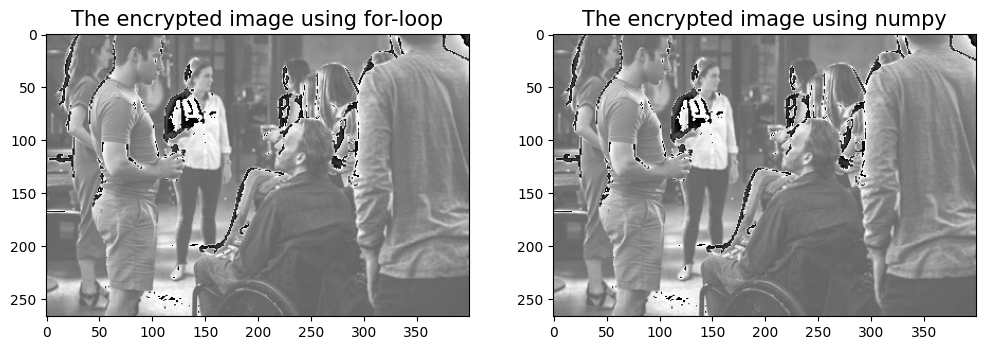

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].set_title('The encrypted image using for-loop', fontsize=15)
axs[0].imshow(pix1, cmap='gray') #Note: This uses the pix1 value

axs[1].set_title('The encrypted image using numpy', fontsize=15)
axs[1].imshow(pix2, cmap='gray'); #Note: This uses the pix2 value

In [30]:
#normally you would use the same name for pix before and after the operation so that your image data is replaced in the memory to do this:
for i in range(pix.shape[0]):
    for j in range(pix.shape[1]):
        pix[i,j] = (pix[i,j] + my_key) % 256

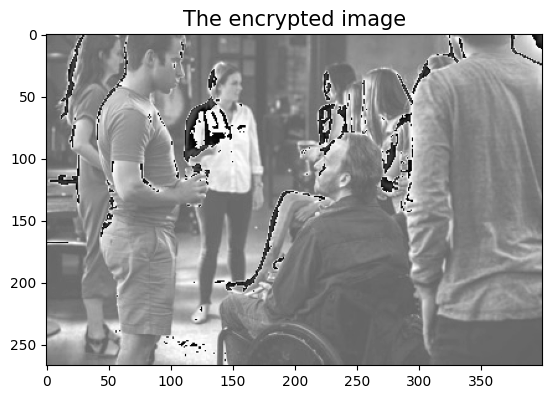

In [31]:
fig, ax = plt.subplots()
ax.set_title('The encrypted image', fontsize=15)
ax.imshow(pix, cmap='gray');

### Step 5 - Save the figure

In [32]:
fig.savefig('Week5/enc_dec_key.png', dpi=300)

### Step 6 - Decrypt it!

For decryption, we undo what we did to encrypt it. This means using subtraction where we added

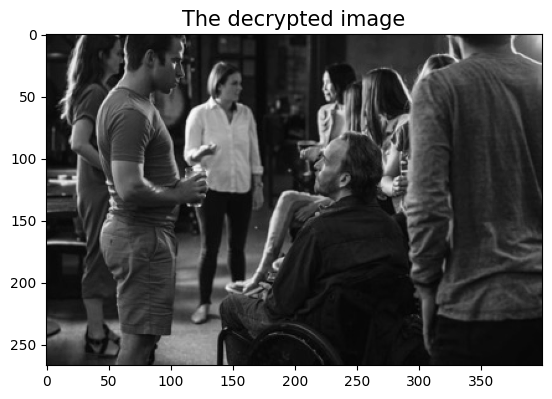

In [33]:
for s in range(pix.shape[0]):
    for t in range(pix.shape[1]):
        pix[s, t] = (pix[s, t] - my_key) % 256

#alternatively:
#pix = np.remainder(pix - my_key, 256)

fig, ax = plt.subplots()
ax.set_title('The decrypted image', fontsize=15)
ax.imshow(pix, cmap='gray');

## Caesar Cipher with Image as the Key

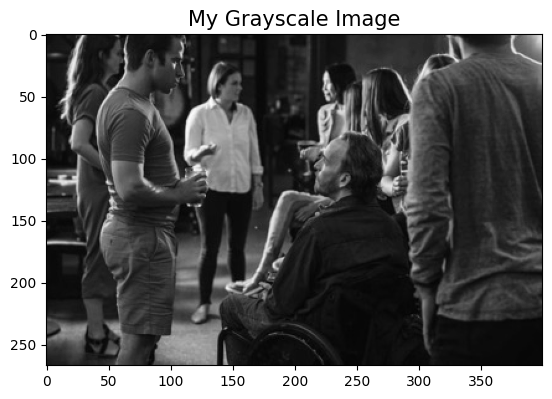

In [27]:
#We'll just get back to step 3. Fresh starts are good
im = PIL.Image.open('Week5/picture1.jpeg')
im1 = im.convert('L')
pix = np.array(im1, dtype='int16')
fig, ax = plt.subplots()
ax.set_title('My Grayscale Image', fontsize=15)
ax.imshow(pix, cmap='gray');

### New step 3

Replacing step 3 above, rather than just using a number as the key, you can also encrypt a photo by reading in an additional image as the key. Here we wil use `picture2.jpeg` as the key for our encryption. The important thing is that **the images are the same size!**

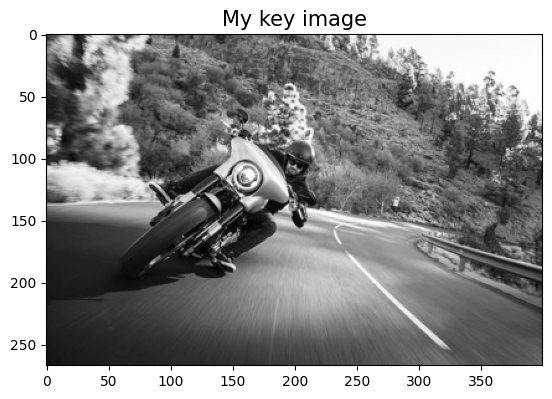

In [28]:
im = PIL.Image.open('Week5/picture2.jpeg')
im2 = im.convert('L')

key_image = np.array(im2, dtype="int16")

fig, ax = plt.subplots()
ax.set_title('My key image', fontsize=15)
ax.imshow(key_image, cmap='gray');

### Step 4 with an image as the key

In [29]:
for s in range(pix.shape[0]):
    for t in range(pix.shape[1]):
        pix[s, t] = (pix[s, t] + key_image[s, t]) % 256


#or alternatively: 
#pix = np.remainder(pix + key_image, 256)

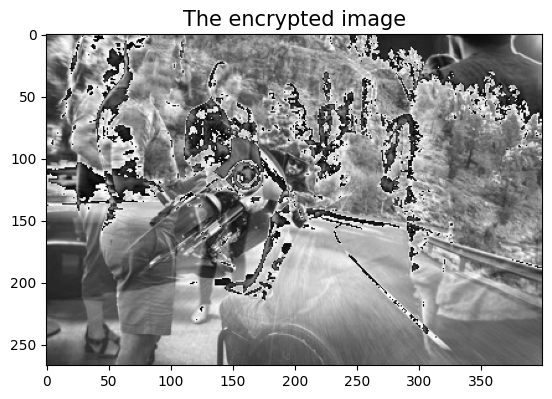

In [30]:
fig, ax = plt.subplots()
ax.set_title('The encrypted image', fontsize=15)
ax.imshow(pix, cmap='gray');

### Step 5 - Save it

In [31]:
fig.savefig('Week5/enc_dec_key2.png', dpi=300)

### Step 6 - Decrypt it!

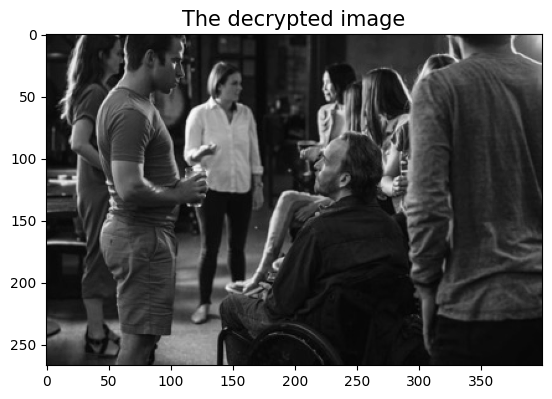

In [32]:
for s in range(pix.shape[0]):
    for t in range(pix.shape[1]):
        pix[s, t] = (pix[s, t] - key_image[s, t]) % 256

#alternatively:
#pix = np.remainder(pix - key_image, 256)

fig, ax = plt.subplots()
ax.set_title('The decrypted image', fontsize=15)
ax.imshow(pix, cmap='gray');

## Challenge Question

Complete this challenge question in class with your team!

1. Slice a section of the Einstein image that is the same size as `picture1.jpeg`, starting from index 0 for both the rows and columns
2. Using this Einstein section, and for-loops, encrypt `picture1.jpeg`
3. Decrypt this version
4. Show the two images side by side using subplots

```
#Step 0. 
im = PIL.Image.open('picture1.jpeg')
im1 = im.convert('L')
pix = np.array(im1, dtype='int16')
print(pix.shape)

#Step 1.
img = PIL.Image.open(EINSTEIN)
img = img.convert('L')
ein_arr_full = np.array(IMAGE, dtype='int16')
ein_arr = ein_arr_full[SLICE]

#Step 2.
#Encrypt following Caesar Cipher with Image as the Key step 4
FOR_LOOP_STUFF
encrypted = pix.copy()

#Step 3. 
#Decrypt following Caesar Cipher with Image as the Key step 6
FOR_LOOP_STUFF
decrypted = pix.copy()

#Step 4.
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(WIDTH, HEIGHT))
LEFT.imshow(encrypted, cmap='gray')
RIGHT.imshow(decrypted, cmap='gray');

In [33]:
#YOUR CODE HERE!

You'll know you have it right when it looks like this!

(267, 400)


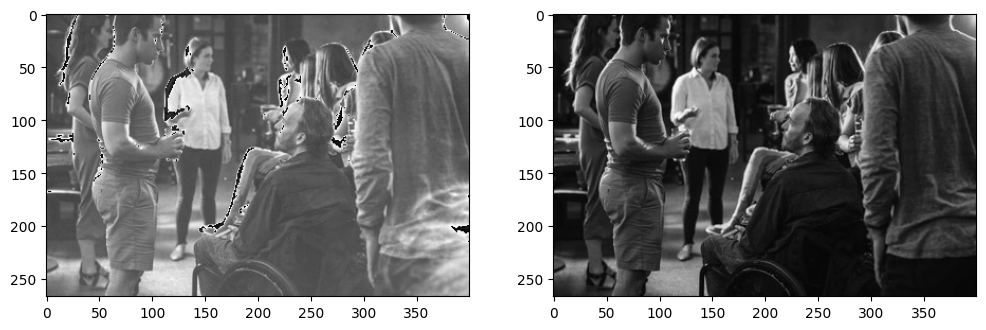

In [36]:
#Answer - No Peaking!

#Step 0.
im = PIL.Image.open('Week5/picture1.jpeg')
im1 = im.convert('L')
pix = np.array(im1, dtype='int16')
print(pix.shape)

#Step 1.
img = PIL.Image.open('Week5/einstein.png')
img = img.convert('L')
ein_arr_full = np.array(img, dtype='int16')
ein_arr = ein_arr_full[:267, :400]

#Step 2.
for s in range(pix.shape[0]):
    for t in range(pix.shape[1]):
        pix[s, t] = (pix[s, t] + ein_arr[s, t]) % 256
encrypted = pix.copy()

#Step 3. 
#Decrypt following Caesar Cipher with Image as the Key step 6
for s in range(pix.shape[0]):
    for t in range(pix.shape[1]):
        pix[s, t] = (pix[s, t] - ein_arr[s, t]) % 256
decrypted = pix.copy()

#Step 4.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(encrypted, cmap='gray')
axs[1].imshow(decrypted, cmap='gray');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7dc91a80-ae46-4ae1-897f-4f90a46b055c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>